# Part 1. Graph representation in Python

1. Create an empty graph 
2. Add a single vertex “Mike” 
3. Add a bunch of vertices : “Amine”, “Rémi”, “Nick” 
4. Add an edge between ‘Mike” and “Amine” 
5. Add an edge between “Amine” and “Rémi” 
6. Add an edge between “Mike” and “Christophe” 
7. Show your graph

In [185]:
#Création de graph vide
import networkx as nx


G = nx.Graph()

Ajout du noeud Mike

In [2]:
G.add_node("Mike")


In [3]:
#Ajout des noeuds Amine, Rémi et Nick
G.add_nodes_from(["Amine", "Remi", "Nick"])

In [4]:
#Ajout de la relation Mike/Amine
G.add_edge("Mike", "Amine")

In [5]:
#Ajout de la relation Amine/Remi
G.add_edge("Amine", "Remi")

In [6]:
#Ajout de la relation Mike/Nick
G.add_edge("Mike", "Nick")

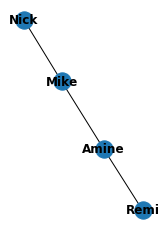

In [7]:
#Affichage du Graphe G
import matplotlib.pyplot as plt


subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

# Part 2. Calculating centrality metrics using Python

Let’s consider a network with 10 vertices and edges distributed as following: [(7,2), (2,3), (7,4), (4,5), (7,3), (7,5), (1,6),(1,7),(2,8),(2,9)] 
1. Create the associated graph by using networkx package. 
2. Calculate its degree centrality
3. Calculate its betweenness centrality 
4. Calculate its closeness centrality 
5. Comment your result.

In [8]:
G = nx.Graph()

In [9]:
G.add_nodes_from([1,2, 3,4,5,6,7,8,9])

In [10]:
G.add_edges_from([(7,2), (2,3), (7,4), (4,5), (7,3), (7,5), (1,6),(1,7),(2,8),(2,9)])

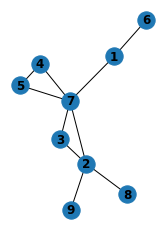

In [11]:
#Affichage du graph
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

### Degree Centrality

In [12]:
nx.degree_centrality(G)

{1: 0.25,
 2: 0.5,
 3: 0.25,
 4: 0.25,
 5: 0.25,
 6: 0.125,
 7: 0.625,
 8: 0.125,
 9: 0.125}

La centralité représente au nombre de sommet connecté au noeud n, divisé par le nombre de noeud restant n - 1, par exemple pour le noeud 7, qui à la plus grande valeur, on a 5 arrètes connectées divisé par 9-1 = 8 soit 5/8 = 0.625

On observe ici que le noeud numéro 7 est le plus grand car il à le plus d'arrètes connectées à lui.


### Betweenness Centrality

In [13]:
nx.betweenness_centrality(G)

{1: 0.25,
 2: 0.46428571428571425,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.7142857142857142,
 8: 0.0,
 9: 0.0}

La betweenness centrality représente le taux de passage par un noeud n pour tout nos plus court chemin, plus celui-ci sera proche de 1, plus ce noeud sera un point de passage pour les plus courts chemins.

On observe que le noeud 7 est le plus actif lors du calcul des plus courts chemins entre tous nos noeux ce qui signifie que pour les plus courts chemins, le 7 sera le plus solicité.

### Closeness Centrality

In [14]:
nx.closeness_centrality(G)

{1: 0.5,
 2: 0.6153846153846154,
 3: 0.5333333333333333,
 4: 0.47058823529411764,
 5: 0.47058823529411764,
 6: 0.34782608695652173,
 7: 0.7272727272727273,
 8: 0.4,
 9: 0.4}

C'est (n-1) où n est le nombre total de noeud divisé par le nombre d'arrêtes reliant un point donné à tous les autres. Donc plus la valeur est proche de 1, plus le noeud est proche de tous les autres. 

On observe que le noeud 7 est le plus proche de 1 avec 5 arrètes reliées à lui, ce qui confirme nos résultats.

# Part 3. Fraud Analytics

1. Create a network with nine vertices and eight edges distributed as following: [(7,2), (2,3), (7,4), (4,5), (7,3), (7,5),(1,6),(1,7),(2,8),(2,9)]


2. In this network, four of the vertices are known fraud cases and are classified as fraud (F). Five of the remaining people have no fraud-related history and are classified as non-fraud (NF). Define nodes [1,4,3,8,9] as NF and [2,5,6,7] as F.   


3. Add labels and color to your network  

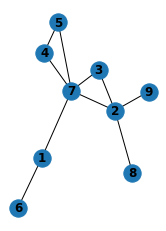

In [15]:
G = nx.Graph()
G.add_nodes_from([1,2, 3,4,5,6,7,8,9])
G.add_edges_from([(7,2), (2,3), (7,4), (4,5), (7,3), (7,5),(1,6),(1,7),(2,8),(2,9)])

#Affichage du graph
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

In [16]:
G.add_nodes_from([2,5,6,7], fraud='F')
G.add_nodes_from([1,4,3,8,9], fraud='NF')

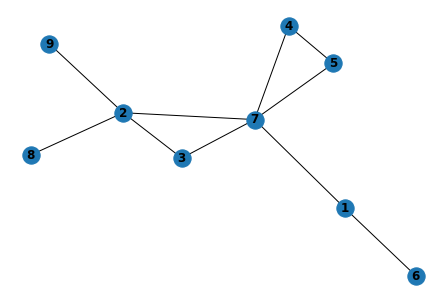

In [17]:
nx.draw(G, with_labels=True, font_weight='bold')

In [18]:
labels = nx.get_node_attributes(G,'fraud') 

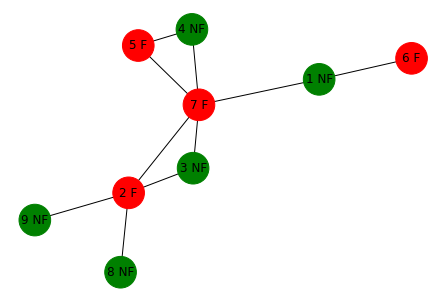

In [19]:

NF = [1,4,3,8,9]
F = [2,5,6,7]
color_map = []
labels = {}
for i in G.nodes():
    if i in NF:
        color_map.append('green')
        labels[i] = str(i) + " NF"
    else:
        color_map.append('red')
        labels[i] = str(i) + " F"
nx.draw(G, labels=labels, node_color=color_map, font_size=12, node_size=1000 )

La fonction de détection de fraude :
    - On introduit un noeud
    - On vérifie la probabilité du noeud :
        - On calcul 1/degré du noeud q introduit
        - On multiplie ce résultat à son poid n multiplié par les poids des relation auquel il est lié w(n,nj)
        - Exemple q est relié à 2 noeuds avec un poids de 0.3 pour n1 et 0.4 pour n2 :
            - 1/2
            - (0.3+0.4) = 0.7
            - 0.5 * 0.7 = 0.35
            La probabilité que ce noeuds soit impliqué dans une fraude est de 35%
        On fixe un taux à T = 50%, si la probabilité est inférieure à T, alors on introduit le noeud comme non frauduleux.

### Ajout de poids
On ajoute des poids à nos relations, nous partons du principe qu'une relation F-F a un poids de 1, une relation entre un F-NF a un poids de 0.5 et une relation entre NF-NF à un poids de 0.

In [31]:
G_poids = nx.Graph()
G_poids.add_nodes_from([1,2, 3,4,5,6,7,8,9])


G_poids.add_weighted_edges_from([(7,2,1.0), (2,3,0.5), (7,4,0.5), (4,5,0.5), (7,3,0.5), (7,5,1.0),(1,6,0.5),(1,7,0.5),(2,8,0.5),(2,9,0.5)])

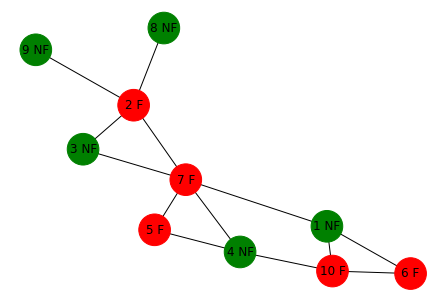

In [182]:
NF = [1,4,3,8,9]
F = [2,5,6,7]
color_map = []
labels = {}
#On parcours nos noeuds
for i in G_poids.nodes():
    if i in NF:
        #Si un noeud n'est pas frauduleux on le colorise en vert sinon en rouge
        color_map.append('green')
        labels[i] = str(i) + " NF"
    else:
        color_map.append('red')
        labels[i] = str(i) + " F"
nx.draw(G_poids, labels=labels, node_color=color_map, font_size=12, node_size=1000 )

# Simple fraud analytics

1. Calculate the likelihood that node q being involved in fraud.

In [112]:
G_poids.add_node(10)

In [113]:
G_poids.add_edges_from([(10,6),(10,1),(10,4)])

In [114]:
tab = list(G_poids.edges(10))

In [177]:
NF = [1,4,3,8,9]
F = [2,5,6,7]
weight = []
tab = list(G_poids.edges(10))
#On parcours la première dimension de notre tuple représentant nos relations, nous avons 3 relations,
#On note le poids à 1 si le noeud est lié avec un noeud fraudulaux, 0 sinon
for i in range(0,3):
    if tab[i][1] in NF:
        weight.append(0) 
    else :
        weight.append(1)
weight

[1, 0, 0]

In [178]:
#On compte le nombre de poids égaux à 1
weight.count(1)

1

In [179]:
#On applique la formule de probabilité de la fraude
p = 1/G_poids.degree(10) * weight.count(1)

In [180]:
p

#On applique notre seuil de faude, si p est supérieur alors on considère notre noeud comme étant frauduleux
T = 0.5

p>t

False

Ici, on observe que p est inférieur à T, on en conclu que le noeud introduit dans notre réseau est non frauduleux.

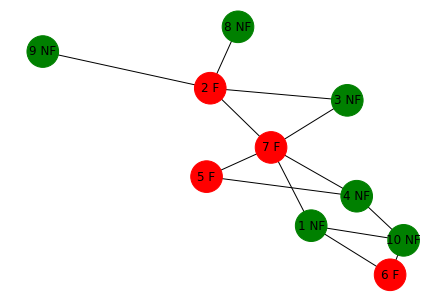

In [183]:
#On ajoute le nouveau noeud 10
NF = [1,4,3,8,9,10]
F = [2,5,6,7]
color_map = []
labels = {}
for i in G_poids.nodes():
    if i in NF:
        color_map.append('green')
        labels[i] = str(i) + " NF"
    else:
        color_map.append('red')
        labels[i] = str(i) + " F"
nx.draw(G_poids, labels=labels, node_color=color_map, font_size=12, node_size=1000 )

## 1. Scoring negative outcomes
## 2. Degree of suspicion (DOS)

- Calculate all of the four centrality metrics of each vertex in our network: degree of centrality, betweenness, closeness and eigenvector. 

- Take the average of these vertices.

- If a person associated with a vertex is involved in fraud, illustrate this negative outcome by scoring the person using the pre-determined values shown in the preceding table.

- Multiply the average of the centrality metrics and the negative outcome score to get the value of the DOS.

- Finally, normalize the DOS by dividing it by the maximum value of the DOS in the network. 

1- Calculate for each vertex, in a given network, its normalized DOS according to the process described above.

### Nous repartons du graph sans le nouveau noeud.

In [128]:
G_new = nx.Graph()
G_new.add_nodes_from([1,2, 3,4,5,6,7,8,9])


G_new.add_edges_from([(7,2), (2,3), (7,4), (4,5), (7,3), (7,5),(1,6),(1,7),(2,8),(2,9)])

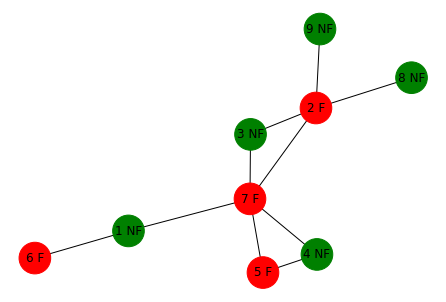

In [130]:

NF = [1,4,3,8,9]
F = [2,5,6,7]
color_map = []
labels = {}
for i in G_new.nodes():
    if i in NF:
        color_map.append('green')
        labels[i] = str(i) + " NF"
    else:
        color_map.append('red')
        labels[i] = str(i) + " F"
nx.draw(G_new, labels=labels, node_color=color_map, font_size=12, node_size=1000 )

### Degree Centrality

In [139]:
d_c = nx.degree_centrality(G_new)
d_c 

{1: 0.25,
 2: 0.5,
 3: 0.25,
 4: 0.25,
 5: 0.25,
 6: 0.125,
 7: 0.625,
 8: 0.125,
 9: 0.125}

### Betweenness Centrality

In [140]:
b_c = nx.betweenness_centrality(G_new)
b_c

{1: 0.25,
 2: 0.46428571428571425,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.7142857142857142,
 8: 0.0,
 9: 0.0}

### Closeness Centrality

In [141]:
c_c = nx.closeness_centrality(G_new)
c_c

{1: 0.5,
 2: 0.6153846153846154,
 3: 0.5333333333333333,
 4: 0.47058823529411764,
 5: 0.47058823529411764,
 6: 0.34782608695652173,
 7: 0.7272727272727273,
 8: 0.4,
 9: 0.4}

### EigenVector Centrality

In [142]:
ev_c = nx.eigenvector_centrality(G_new)
ev_c

{1: 0.23718954703334272,
 2: 0.44568334430993706,
 3: 0.3644005791401007,
 4: 0.3204396611665085,
 5: 0.3204396611665085,
 6: 0.08325088296668741,
 7: 0.5925237685713423,
 8: 0.15643115829567805,
 9: 0.15643115829567805}

In [157]:
#On stock nos moyennes dans une liste
list_mean = []
for i in range(1,10):
    list_mean.append((d_c[i] + b_c[i] + c_c[i] + ev_c[i])  / 4)

In [156]:
list_mean


[0.3092973867583357,
 0.5063384184950667,
 0.2869334781183585,
 0.2602569741151565,
 0.2602569741151565,
 0.13901924248080227,
 0.6647705525324459,
 0.1703577895739195,
 0.1703577895739195]

Noeuds frauduleux : [2,5,6,7]


In [160]:
print("Score négativité pour le noeud 2 : ", list_mean[1])
print("Score négativité pour le noeud 5 : ", list_mean[4])
print("Score négativité pour le noeud 6 : ", list_mean[5])
print("Score négativité pour le noeud 7 : ", list_mean[6])

Score négativité pour le noeud 2 :  0.5063384184950667
Score négativité pour le noeud 5 :  0.2602569741151565
Score négativité pour le noeud 6 :  0.13901924248080227
Score négativité pour le noeud 7 :  0.6647705525324459


In [184]:
#On calcul la moyenne de notre liste des centralités
mean_list_mean = sum(list_mean) / len(list_mean)

In [163]:
mean_list_mean

0.30750984508479573

In [165]:
print("DOS pour le noeud 2 : ", list_mean[1] * mean_list_mean)
print("DOS pour le noeud 5 : ", list_mean[4] * mean_list_mean)
print("DOS pour le noeud 6 : ", list_mean[5] * mean_list_mean)
print("DOS pour le noeud 7 : ", list_mean[6] * mean_list_mean)

DOS pour le noeud 2 :  0.1557040486318984
DOS pour le noeud 5 :  0.08003158179238948
DOS pour le noeud 6 :  0.042749785719077164
DOS pour le noeud 7 :  0.2044234896261865


In [166]:
dos_1 =  list_mean[1] * mean_list_mean
dos_5 =  list_mean[4] * mean_list_mean
dos_6 =  list_mean[5] * mean_list_mean
dos_7 =  list_mean[6] * mean_list_mean


In [173]:
print("DOS normalisé pour le noeud 2 : ", dos_1 / dos_7)
print("DOS normalisé pour le noeud 5 : ", dos_5 / dos_7)
print("DOS normalisé pour le noeud 6 : ", dos_6 / dos_7)
print("DOS normalisé pour le noeud 7 : ", dos_7 / dos_7)

DOS normalisé pour le noeud 2 :  0.7616739588812539
DOS normalisé pour le noeud 5 :  0.39149895121513223
DOS normalisé pour le noeud 6 :  0.20912364717601878
DOS normalisé pour le noeud 7 :  1.0


On observe que plus un noeud est lié à d'autres noeuds, plus sont DOS normalisé est élevé, ce qui représente une plus grande chance d'être un noeud frauduleux.

## 3. Dos of a new Node

1- Calculate the DOS of the new node q.

In [168]:
p

0.3333333333333333

On recupère le résultat de la probabilité du noeud introduit p, on sait que le noeud frauduleux auxquel le noeud 10 est associé est le noeud 6, nous multiplions donc notre probabilité avec le dos 6 normalisé.

In [181]:
p * (dos_6/dos_7)

0.06970788239200626

On observe un degré de suspicion compris entre 0 et 0.10 pour le noeud 10.

D'après le tableau donné en énoncé, on en déduit que le noeud 10 présente un faible risque de fraude ce qui est plutôt cohérent car le noeud 10 est lié à 2 noeud non-frauduleux pour 1 noeud frauduleux avec un faible DOS.